In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import scipy.stats as st
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
data = pd.read_csv("iris.csv")


In [12]:
data.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
data.tail()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [14]:
data.shape


(150, 5)

In [15]:
data.isnull()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [16]:
data.isnull().sum()


Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [17]:
data.describe()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
data.dtypes


Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
data.columns


Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [22]:
data['Species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
data['Species'].nunique()


3

In [24]:
data['Species'].value_counts()


setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [25]:
data.max()


Sepal.Length          7.9
Sepal.Width           4.4
Petal.Length          6.9
Petal.Width           2.5
Species         virginica
dtype: object

In [27]:
df = data.groupby('Species')
df

In [28]:
df.head(5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [29]:
df.tail(5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
45,4.8,3.0,1.4,0.3,setosa
46,5.1,3.8,1.6,0.2,setosa
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


C:\Users\ABC\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


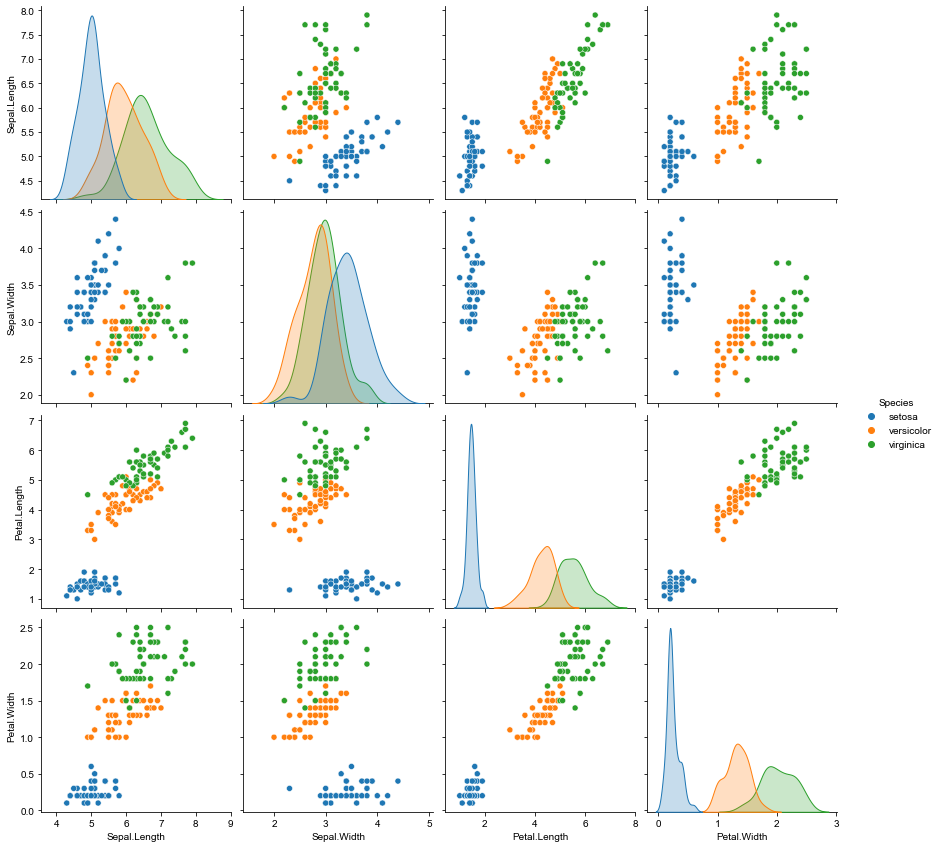

In [30]:
sns.pairplot(data, hue = "Species", size = 3);
sns.set_style("whitegrid");
plt.show()

<AxesSubplot:xlabel='Sepal.Length', ylabel='Petal.Width'>

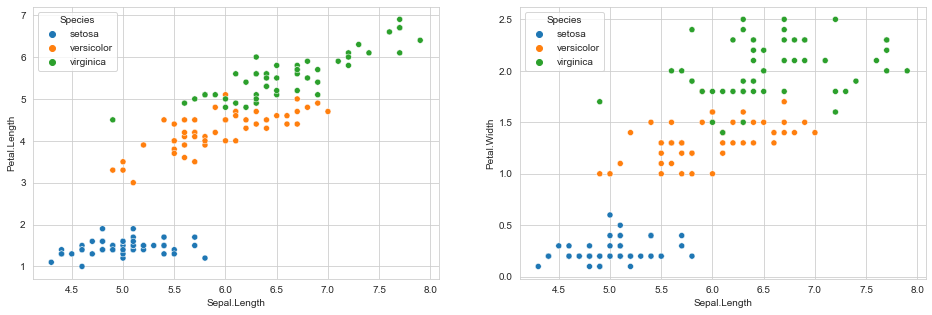

In [33]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='Sepal.Length',y='Petal.Length',data=data,hue='Species',ax=ax1)
sns.scatterplot(x='Sepal.Length',y='Petal.Width',data=data,hue='Species',ax=ax2)

<AxesSubplot:ylabel='Petal.Width'>

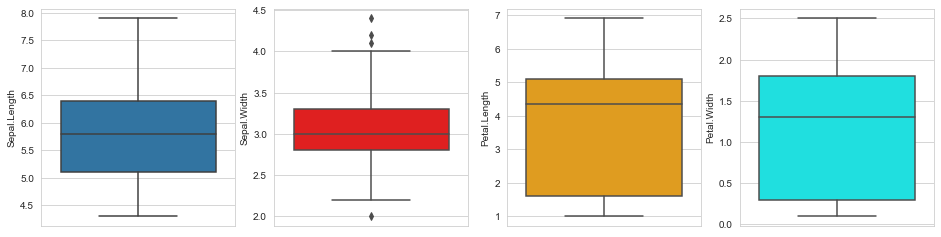

In [35]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=data,y='Sepal.Length')
plt.subplot(1,4,2)
sns.boxplot(data=data,y='Sepal.Width',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=data,y='Petal.Length',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=data,y='Petal.Width',color='cyan')

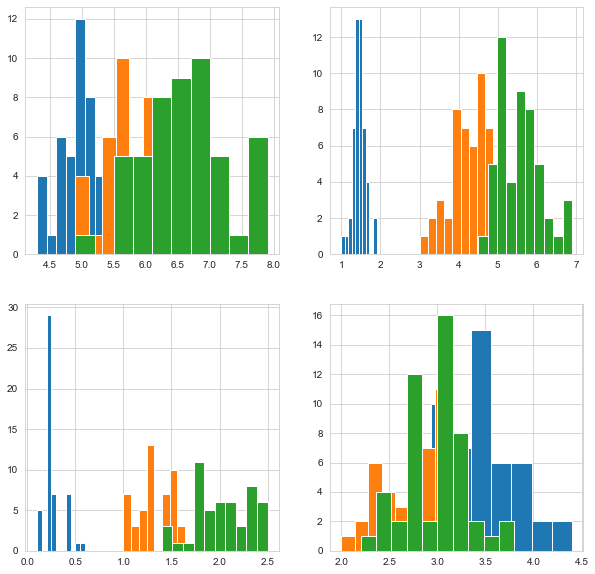

In [37]:
def histplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    df['Sepal.Length'].hist(ax=axes[0][0])
    df['Petal.Length'].hist(ax=axes[0][1])
    df['Petal.Width'].hist(ax=axes[1][0])
    df['Sepal.Width'].hist(ax=axes[1][1])
    plt.show()
    
histplots()

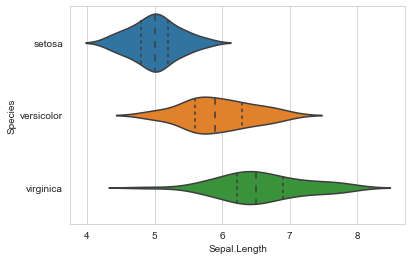

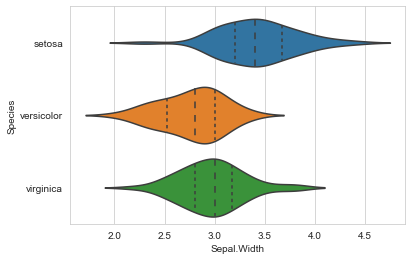

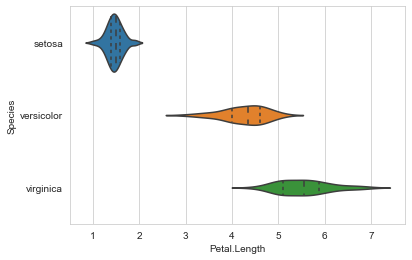

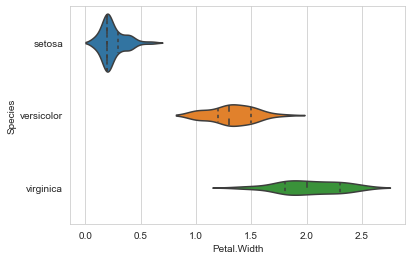

In [38]:
sns.violinplot(y='Species', x='Sepal.Length', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Sepal.Width', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Petal.Length', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='Petal.Width', data=data, inner='quartile')
plt.show()

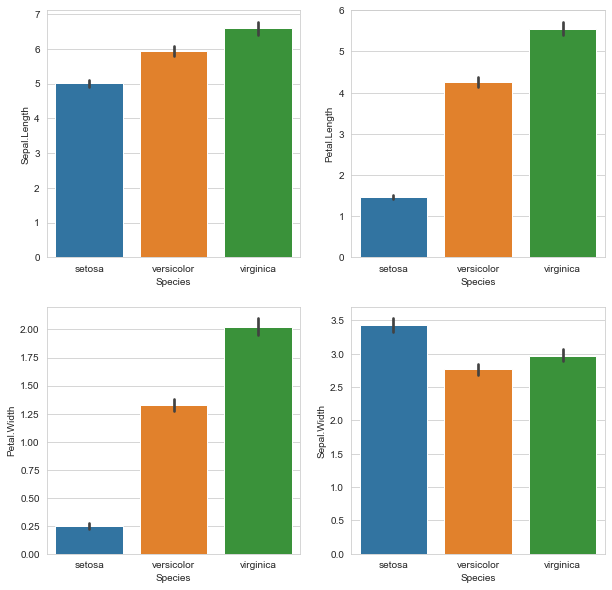

In [40]:
def barplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    sns.barplot(x=data.Species,y=data['Sepal.Length'],ax=axes[0][0])
    sns.barplot(x=data.Species,y=data['Petal.Length'],ax=axes[0][1])
    sns.barplot(x=data.Species,y=data['Petal.Width'],ax=axes[1][0])
    sns.barplot(x=data.Species,y=data['Sepal.Width'],ax=axes[1][1])
    plt.show()
    
barplots()

In [41]:
data.corr()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

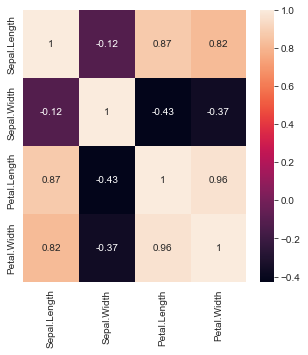

In [42]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)


In [44]:
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
data.sample(15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
96,5.7,2.9,4.2,1.3,1
21,5.1,3.7,1.5,0.4,0
133,6.3,2.8,5.1,1.5,2
5,5.4,3.9,1.7,0.4,0
37,4.9,3.6,1.4,0.1,0
81,5.5,2.4,3.7,1.0,1
48,5.3,3.7,1.5,0.2,0
104,6.5,3.0,5.8,2.2,2
118,7.7,2.6,6.9,2.3,2
91,6.1,3.0,4.6,1.4,1


In [45]:
x = data.iloc[:,:4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:
y = data.iloc[:,4].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [48]:
model = LogisticRegression()

model.fit(x_train,y_train)

sc_logr = round(model.score(x_test, y_test) * 100,2)

print("Accuracy: ", str(sc_logr) ,  " %")

Accuracy:  100.0  %


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
